In [4]:
import scipy.io as sio
import scipy as scipy
import scipy.ndimage
import scipy.stats
import numpy as np
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## Compare parameters:

increase number of filters: result is better, but the result does not improve much after certain number<br/>
increase number of motifs: result is better, but the result does not improve much after certain number<br/>
increase number learning rate: 0.1->0.01 give bad result, < 0.00001: take very long time to converge<br/>

regulization: 0.7->0.10 is a good range<br/>

the optimal parameters depend on the train/test set<br/>

## Compare architectureconvolute + flatten + dense(sigmoid) + concate + dens
CNN: convolute + flatten + concate + dense (softmax)
<br/>
Kullback Leibler Divergence: generally can give better result for SDnew ~83%: KLD give better result for imbalance range (48-75)<br/> 
general result: SDNew ~83%, SD0 ~ 77%, SD1 ~ 77% SDCrypt: ~64%

RMSE: generally can give better result for SD0, SD1<br/>
general result: SDNew ~80% SD0 ~ 79% SD1: ~78% SDCrypt ~65%

Cross entropy:<br/> 
general result: SDNew ~79% SD0 ~77% SD1: ~77% SDCrypt ~64%


CNN: convolute + flatten + dense(sigmoid) + concate + dense (sigmoid for RMSE, softmax for KL,CE):
result got improve

KLD:
best result:

SD New 0.8526 SD0 0.7977 SD1 0.8061 SD0CRYPT 0.6629

Cross entropy:
SD New 0.843788301873 SD0 0.790382694501 SD1 0.797435521379 SD0CRYPT 0.650376426231

RMSE: 
SD New 0.829429590184 SD0 0.78744025329 SD1 0.790070436009 SD0CRYPT 0.636229620447

## ...
the best L1 are not fixed when we randomize training/test set


## Best parameter from hyperopt:
best_parameters: 0 :{'task_specific': 1, 'filters': 2, 'hidden_layer': 0, 'l1_3': 6.156281322944606e-07, 'm_lr': 0.00010144196294995054, 'l1': 2.7963711101376763e-08, 'use_1by1_conv': 1, 'motif_width': 4, 'l1_1': 2.3794563161482e-12, 'l1_2': 1.3638773409491815e-12}

## Plot the R2 curve of prediction vs actual 

In [5]:
def plot_figure(x, y, title):
    
    a = 0.5
    psize = .1
    fsize = 13.85
    rasterized_on = True
    bins =50
    axlim = [0,1,0,1]
    hist_thresh = 300.

    fig = figure(figsize=(10*1,1.875*1))
    width=0.18
    height = 1
    #ax = fig.add_subplot(221)
    ax = axes([0,0,width,height])
    axis([0,1,0,1])
    sd = 0
    scatter(x,y,s=psize,edgecolor='None',alpha = a,rasterized=rasterized_on)
    z, xedge, yedge = np.histogram2d(y, x, bins=[bins, bins], 
                                        range=(axlim[:2],axlim[2:]))
    z = scipy.ndimage.zoom(z, 3)
    ax.tick_params(labelsize=fsize)
    ax.set_xticks([0,0.5,1])
    ax.set_xticklabels(['0','0.5','1'])
    ax.set_yticks([0,0.5,1])
    ax.set_yticklabels(['0','0.5','1'])
    text(1,0.03,'$R^2$=%.2f' %(scipy.stats.pearsonr(x,y)[0]**2),fontsize=fsize,ha='right')
    ax.set_title(title,fontsize=fsize)
    ax.set_ylabel('RNA-seq',fontsize=fsize)
    ax.set_xlabel('Model Predictions',fontsize=fsize)

def get_data(data_file, model_file, num_of_partition = 1):
    ###read data
    data = sio.loadmat(data_file)
    #for i in range(num_of_partition):
    model_data = sio.loadmat(model_file)
    test_inds = model_data['Test_index']
    print(model_data['Prediction'].shape)
    ### get Y_pred and Y
    Y_pred = model_data['Prediction'][test_inds]
    Y = scipy.matrix(data['Y'])[test_inds]
    print(Y.shape)
    Y = Y.reshape(shape(Y)[1],shape(Y)[2])
    Y_pred = Y_pred.reshape(shape(Y_pred)[1],shape(Y_pred)[2]) 
    
    return Y, Y_pred

# Plot curve for Kullback Leibler Divergence  loss function

(265044, 81)
(1, 26504, 81)


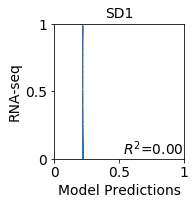

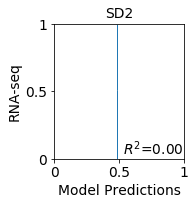

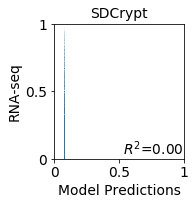

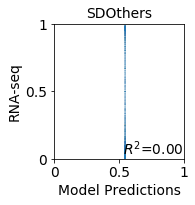

In [64]:
Y, Y_pred = get_data('../results/feature_donor_seq.mat','../results/concise' + '/Partition'+str(0)+'/Training_data_kl.mat')
## plot figure
Y = np.array(Y)
Y_pred = np.array(Y_pred)


plot_figure(Y_pred[:,0],Y[:,0], "SD1")
plot_figure(Y_pred[:,1],Y[:,1], "SD2")
plot_figure(Y_pred[:,79],Y[:,79], "SDCrypt")
plot_figure(sum(Y_pred[:,5:35],axis=1) + sum(Y_pred[:,48:77],axis=1)
,sum(Y[:,5:35],axis=1) + sum(Y[:,48:77],axis=1), "SDOthers")

# Plot curve for RMSE loss function


(265044, 81)
(1, 26504, 81)


/opt/modules/i12g/anaconda/3-4.1.1/envs/dev_concise/lib/python3.5/site-packages/scipy/stats/stats.py:3029: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/opt/modules/i12g/anaconda/3-4.1.1/envs/dev_concise/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


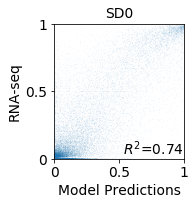

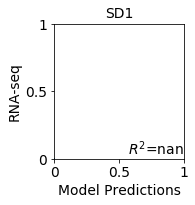

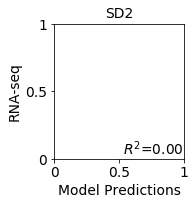

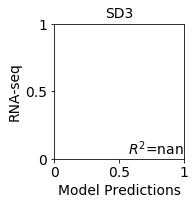

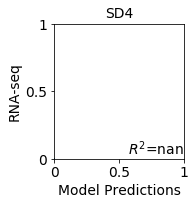

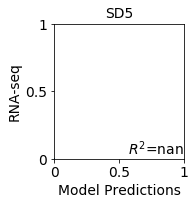

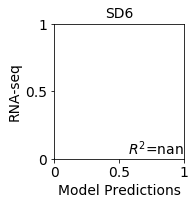

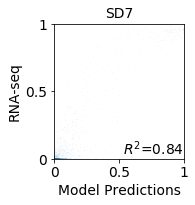

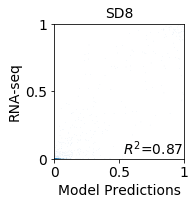

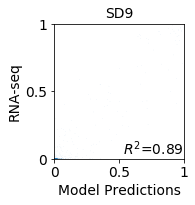

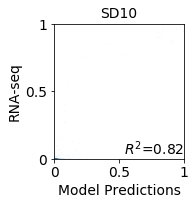

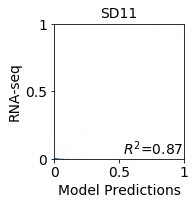

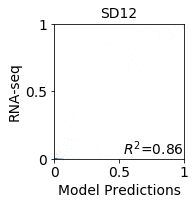

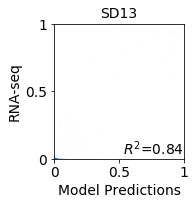

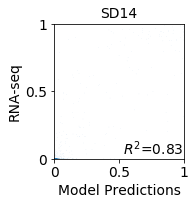

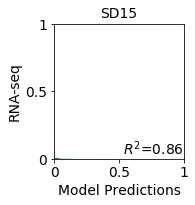

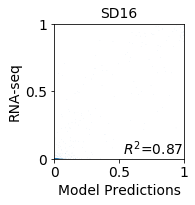

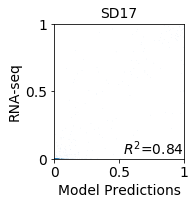

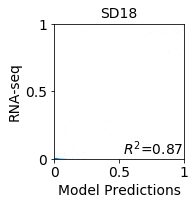

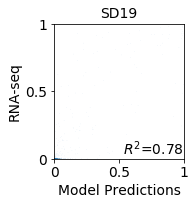

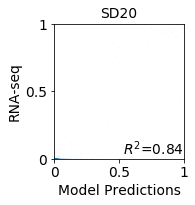

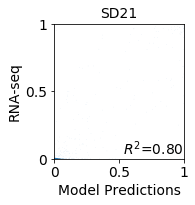

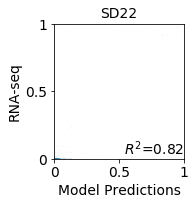

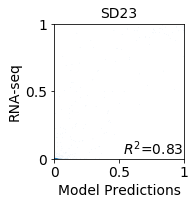

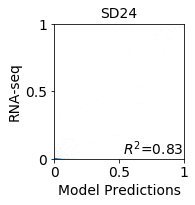

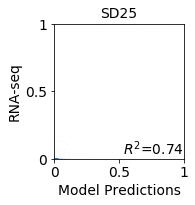

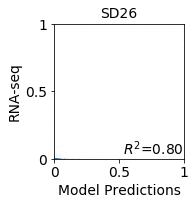

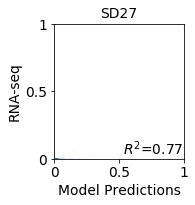

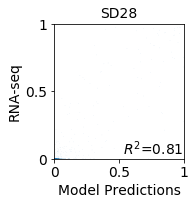

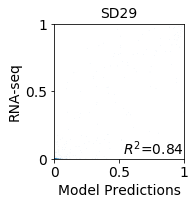

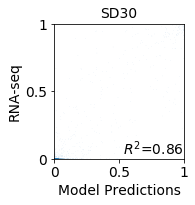

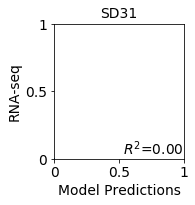

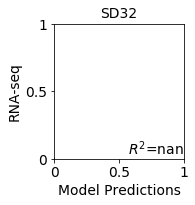

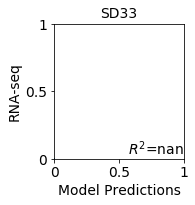

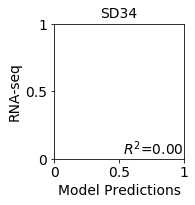

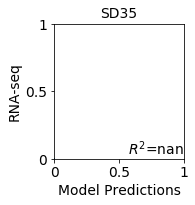

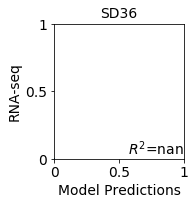

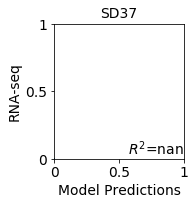

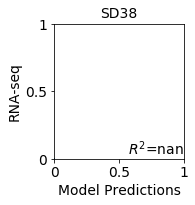

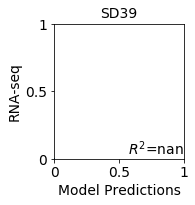

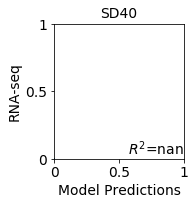

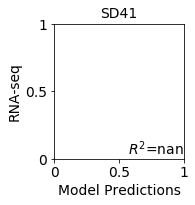

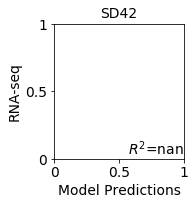

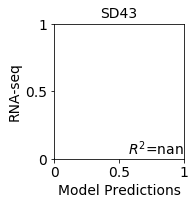

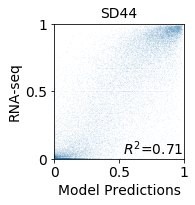

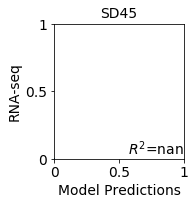

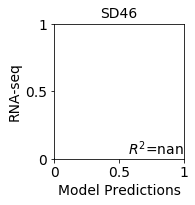

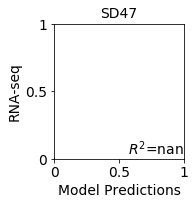

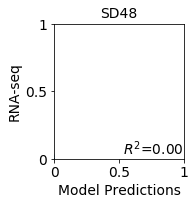

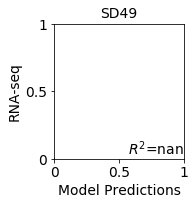

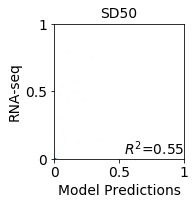

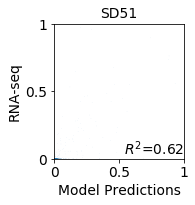

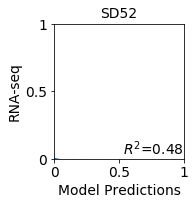

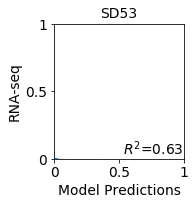

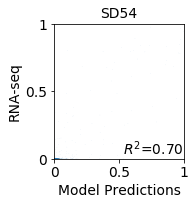

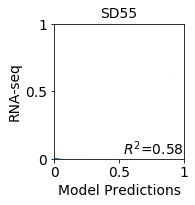

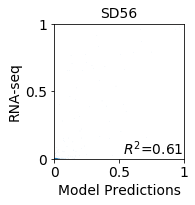

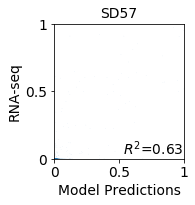

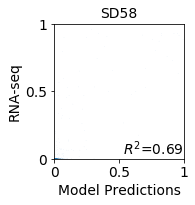

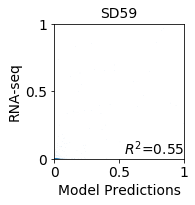

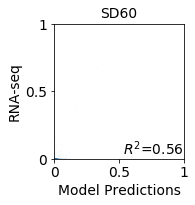

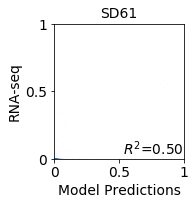

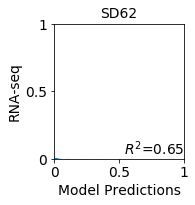

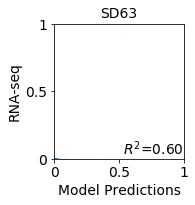

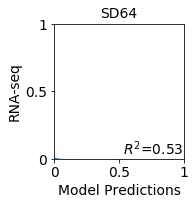

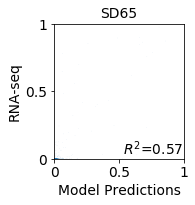

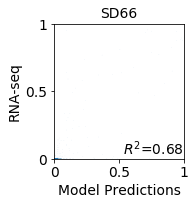

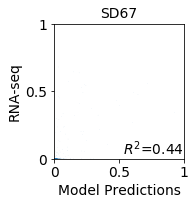

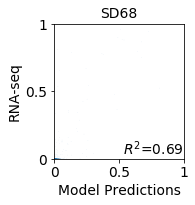

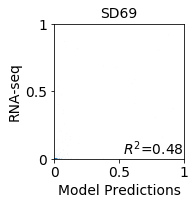

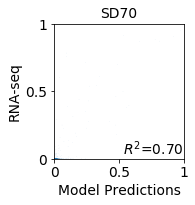

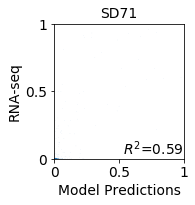

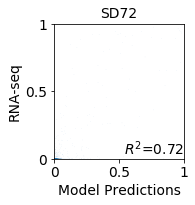

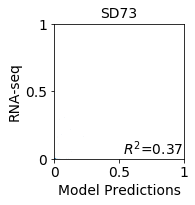

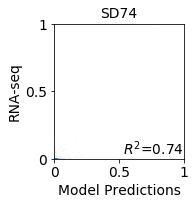

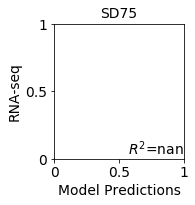

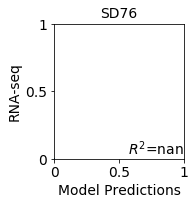

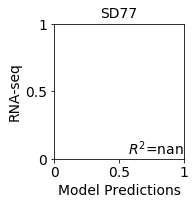

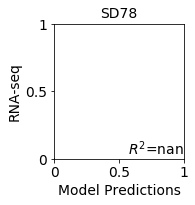

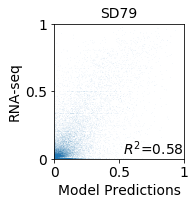

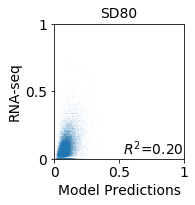

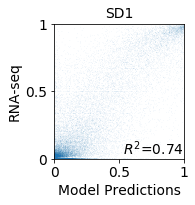

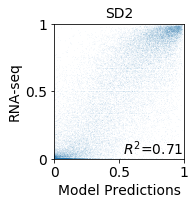

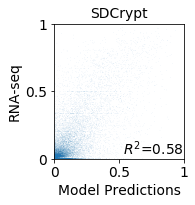

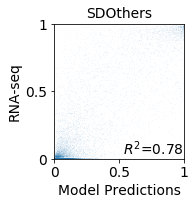

In [8]:

Y, Y_pred = get_data('../results/feature_donor_seq.mat','../results/concise' + '/Partition'+str(0)+'/Training_data_test.mat')
## plot figure
Y = np.array(Y)
Y_pred = np.array(Y_pred)

for i in range(0,81):
    plot_figure(Y_pred[:,i],Y[:,i], "SD" + str(i))

plot_figure(Y_pred[:,0],Y[:,0], "SD1")
plot_figure(Y_pred[:,44],Y[:,44], "SD2")
plot_figure(Y_pred[:,79],Y[:,79], "SDCrypt")
plot_figure(sum(Y_pred[:,5:35],axis=1) + sum(Y_pred[:,48:77],axis=1)
,sum(Y[:,5:35],axis=1) + sum(Y[:,48:77],axis=1), "SDOthers")


# Plot curve for the result in the Cell paper

(100, 81)
(1, 10, 81)


/opt/modules/i12g/anaconda/3-4.1.1/envs/dev_concise/lib/python3.5/site-packages/scipy/stats/stats.py:3029: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


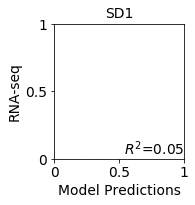

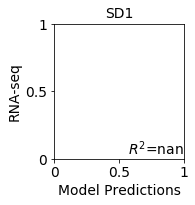

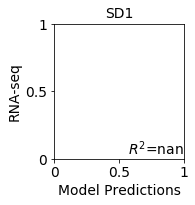

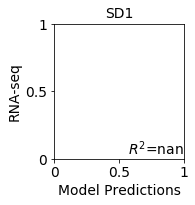

In [57]:
Y, Y_pred = get_data('../data/feature_6mer_pos.mat','../results/cell_paper')
## plot figure
Y = np.array(Y)
Y_pred = np.array(Y_pred)

plot_figure(Y_pred[:,0],Y[:,0], "SD1")
plot_figure(Y_pred[:,1],Y[:,1], "SD1")
plot_figure(Y_pred[:,2],Y[:,2], "SD1")
plot_figure(Y_pred[:,3],Y[:,3], "SD1")
#plot_figure(Y_pred[:,44],Y[:,44], "SD2")
#plot_figure(Y_pred[:,79],Y[:,79], "SDCrypt")
#plot_figure(sum(Y_pred[:,5:35],axis=1) + sum(Y_pred[:,48:77],axis=1)
#,sum(Y[:,5:35],axis=1) + sum(Y[:,48:77],axis=1), "SDOthers")

